In [4]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')      #for divide by zero
from __future__ import division                   #for divide by zero
import time, shutil
import sys
import matplotlib.pyplot as plt
import os, glob, pdb, math
import math 
import pandas as pd #for dataframe object

In [5]:
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs

In [6]:

# 1. Create array of rows with information (for each dwarf galaxy)
# 2. Index within the row to find data for each column
# 3. Create list with just column data 
# DMID is column 0

file = open('ddmergers_pairs_sdss_BPT.dat')
list = []
for line in file:
    list += [line.split()]
    
column_7_Halpha = [x[7] for x in list]           # This list has Halpha data
column_7_Halpha.remove(column_7_Halpha[0])

column_9_Hbeta = [x[9] for x in list]            # This list has Hbeta data
column_9_Hbeta.remove(column_9_Hbeta[0])

column_5_NII = [x[5] for x in list]              # This list has NII data
column_5_NII.remove(column_5_NII[0])

column_11_OIII = [x[11] for x in list]           # This list has OIII data
column_11_OIII.remove(column_11_OIII[0])
    

In [7]:

# Convert elements from column list from STRING to FLOAT

column_7_Halpha = [float(x) for x in column_7_Halpha]

column_9_Hbeta = [float(x) for x in column_9_Hbeta]

column_5_NII = [float(x) for x in column_5_NII]

column_11_OIII = [float(x) for x in column_11_OIII]


In [13]:

# Calculate NII/Halpha: create list for divided values --> divideNII has list of divided values

initLen = len(column_7_Halpha)    
divideNII = []
i = 0
rmList = []

while i<initLen:
    if column_7_Halpha[i] != 0.000:
        divideNII_value = column_5_NII[i] / column_7_Halpha[i]      
        divideNII.append(divideNII_value)
        i+=1
        
    elif column_7_Halpha[i] == 0.000:
        divideNII.append("NO VALUE DIVIDE BY ZERO")
        
        rmList.append(i)

        divideNII.remove(divideNII[i]) 
        
        i+=1
    else:
        print("OTHER ERROR")

finalLen = len(divideNII)
removes = initLen - finalLen


# tester
print("\n" + "DivideNII/Halpha :" + "\n", divideNII)
print("\n" + "Initial length ", initLen)
print("Final length ", finalLen)
print("Removed: ", removes, " values at row(s): ", rmList)
print(divideNII[12])     # at the removed value, we replace it with the 13th row value, decrease size -1



DivideNII/Halpha :
 [0.04753295890778653, 0.05695740783954496, 0.09183473958098332, 0.07728372710322169, 0.05718062271553845, 0.040025648494071885, 0.02359514573472366, 0.008717904827114003, 0.0950141251427541, 0.06630737250451989, 0.03995079742110621, 0.04909889740863043, 0.10877223055496037, 0.19335501694767496, 0.13579533483822423, 0.18428529099053564, 0.20428515148494644, 0.04306277689542757, 0.05708868188590089, 0.12192694368369592, 0.1920652825625235, 0.14037015827843044, 0.1112562134180417, 0.35416844004834946, 0.1161561361043875, 0.39494112183166696, 0.11799016884252099, 0.15840661224779376, 0.3422023875673368, 0.18663015936472693, 0.24258109530062766, 0.1576478341621233, 0.41334931273964903, 0.10321782434489113, 0.0004911879549305094, 0.066797317799301, 0.03355621424822256, 0.06477107354752043, 0.16155746517945815, 0.2115991365784544, 0.10695026553263526, 0.13030534351145037, 0.10379419926515153, 0.1372055937193327, 0.2734129483524498, 0.11294736334250013, 0.21820375159003638

In [11]:

# Calculate OIII/Hbeta: create list for divided values --> divideOIII has list of divided values

initLen = len(column_7_Halpha)                 
divideOIII = []
i = 0
rmList = []

while i<initLen:
    if column_9_Hbeta[i] != 0.000:
        divideOIII_value = column_11_OIII[i] / column_9_Hbeta[i]     
        divideOIII.append(divideOIII_value)
        i+=1
        
    elif column_9_Hbeta[i] == 0.000:
        divideOIII.append("NO VALUE DIVIDE BY ZERO")
        
        rmList.append(i)

        divideOIII.remove(divideOIII[i])    
                
        i+=1
    else:
        print("OTHER ERROR")

finalLen = len(divideOIII)
removes = initLen - finalLen



# tester
# print("\n" + "DivideOII/Hbeta :" + "\n", divideOIII)
# print("\n" + "Initial length ", initLen)
# print("Final length ", finalLen)
# print("Removed: ", removes, " values at row(s): ", rmList)
# print(divideOIII[12])     # at the removed value, we replace it with the 13th row value, decrease size -1


In [595]:

# Log function on list of values --> logN_Ha has list of log(NII/Halpha) data, ie the calculated x-values

logN_Ha = []
j = 0
rmListlogN = []

while j < len(divideNII):
    logN_Ha_value = np.log10(divideNII[j])
    
    if math.isnan(logN_Ha_value) == False:
        logN_Ha.append(logN_Ha_value)
        j += 1
    elif math.isnan(logN_Ha_value) == True:
        logN_Ha.append("nan value")
        
        rmListlogN.append(j)
    
        logN_Ha.remove(logN_Ha[j])
        j += 1
    
    else:
        print("Other Error")


# Convert log list to array
logN_Ha_arr = np.array(logN_Ha)


        
# tester
# print("\n" + "X values: " + "\n", logN_Ha_arr)
# print("\n" + "Length: ", len(logN_Ha_arr))
# print("\n" + "Removed value(s) at row: ", rmListlogN)


In [596]:

# Log function on list of values --> logO_Hb has list of log(OIII/Hbeta) data, ie the calculated y-values

logO_Hb = []
k = 0
rmListlogO = []

while k < len(divideOIII):
    logO_Hb_value = np.log10(divideOIII[k])
    
    if math.isnan(logO_Hb_value) == False:
        logO_Hb.append(logO_Hb_value)
        k += 1
    elif math.isnan(logO_Hb_value) == True:
        logO_Hb.append("nan value")
        
        rmListlogN.append(k)
    
        logN_Ha.remove(logN_Ha[k])
        k += 1
    
    else:
        print("Other Error")
        
        
# Need to remove last element, since log value for corresponding x value is NaN
logO_Hb.remove(logO_Hb[118])


# Convert log list to array
logO_Hb_arr = np.array(logO_Hb)
    

# tester
# print("\n" + "Y values: " + "\n", logO_Hb_arr)
# print("\n" + "Length: ", len(logO_Hb_arr))
# print("\n" + "Removed value(s) at row: ", 118)


In [597]:

# z = data['z']  #consider that for z>0.4: BPT diagrams can no longer be used (filter out --> infrared)


In [598]:

# Table of x-y values (to check), double checked with Excel and equations, just uncomment the print function for table

m = 0
while m < len(logO_Hb_arr):
    # print(logN_Ha_arr[m], " ", logO_Hb_arr[m])
    m += 1
    

<function matplotlib.pyplot.show(close=None, block=None)>

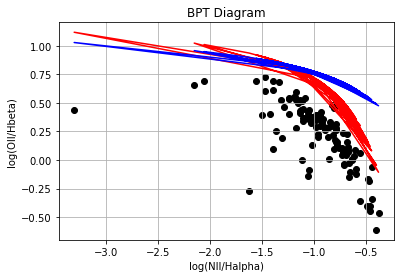

In [599]:

# Plot the values
x = logN_Ha_arr
y = logO_Hb_arr

plt.scatter(x, y, color = "black")


y = (0.61/(x - .05)) + 1.3
plt.plot(x, y, color = "red")  # empirical separation of SF galaxies and AGN based on SDSS galaxies 

y =(0.61/(x-.47)) + 1.19       
plt.plot(x, y, color = "blue")  # theoretical limit for star-forming galaxies 


plt.grid()
plt.xlabel("log(NII/Halpha)")
plt.ylabel("log(OII/Hbeta)")
plt.title("BPT Diagram")


plt.show
